# 911 Calls Project

For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Importing the required libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the CSV file downloaded from kaggle

In [9]:
df = pd.read_csv('911.csv')

In [10]:
#Check the info of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [11]:
#Check the head of the dataset
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


### The top 5 zipcodes

In [12]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### Top 5 townships for the 911 calls 

In [13]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [14]:
#Unique Titles
df['title'].nunique()

110

### Creating new column named 'Reason' which states the reason for the 911 call made which are EMS,Fire and Traffic

In [15]:
df['Reason'] = df['title'].apply(lambda x:x.split(':')[0] )

### Most Common reason for a call

In [16]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Countplot of 911 calls by reason 

<AxesSubplot:xlabel='Reason', ylabel='count'>

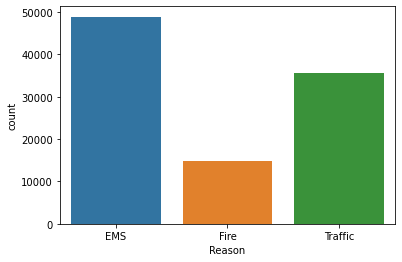

In [17]:
sns.countplot(x='Reason',data=df)

In [18]:
#Data type of timeStamp
type(df['timeStamp'].iloc[0])

str

In [19]:
#Converting the timestamps from strings to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

### Creating 3 new columns called Hour , Month and Day of Week based off the timeStamp column using the .apply() method

In [20]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

### Maping the actual string names to the day of the week using the .map() method

In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
df['Day of Week'] = df['Day of Week'].map(dmap)

### Countplot of Day of the week with hue as reason

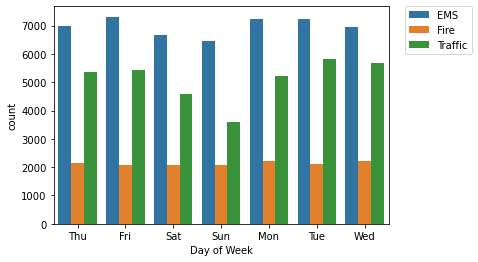

In [23]:
sns.countplot(x='Day of Week',data=df,hue='Reason')

#To relocate the legend box 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Countplot of Month with hue as reason

<AxesSubplot:xlabel='Month', ylabel='count'>

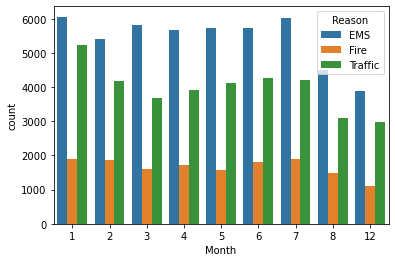

In [39]:
sns.countplot(x='Month',data=df,hue='Reason')

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

### Now we group the Data Frame by the month column and use the count() method for aggregation.

In [40]:
byMonth = df.groupby('Month').count()
byMonth.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


### Simple plot indicating the count of calls per month

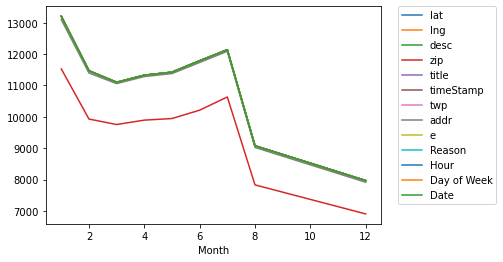

In [41]:
byMonth.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Linear fit on number of calls per month using Seaborn's lmplot

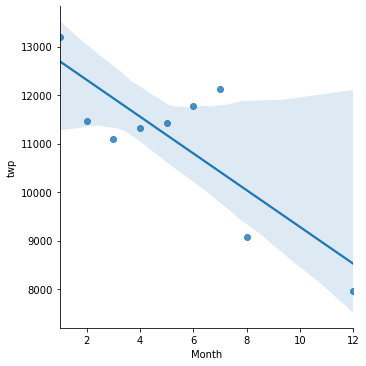

In [27]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())


### Creating a new Date Column

In [28]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

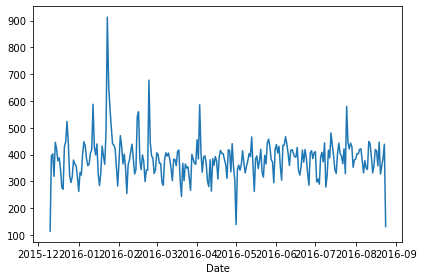

In [29]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

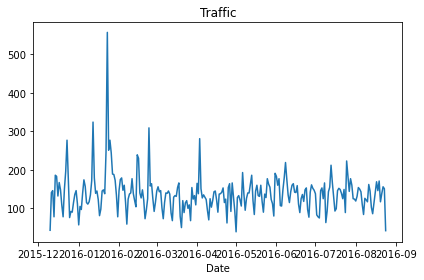

In [30]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

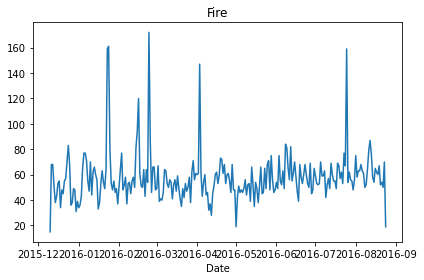

In [31]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

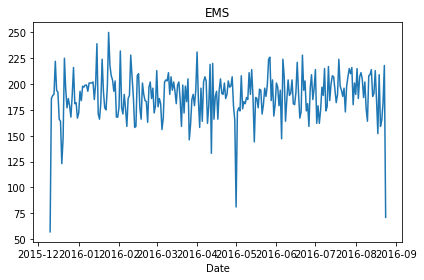

In [32]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____

### Restructuring the Data Frame so that columns become the Hours and the index becomes Day of the week

In [33]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


### Creating a heat map for the above data frame

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

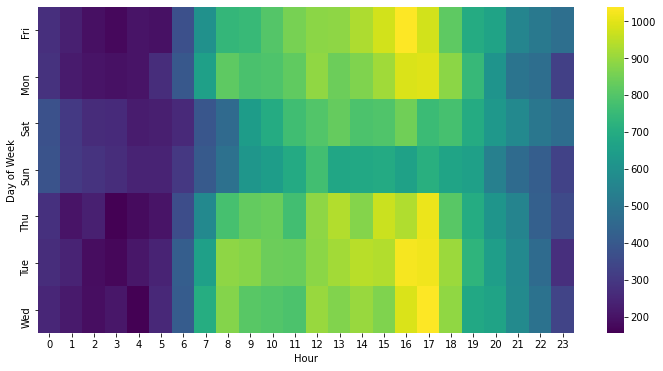

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(data = dayHour,cmap='viridis')


### Creating a cluster map 

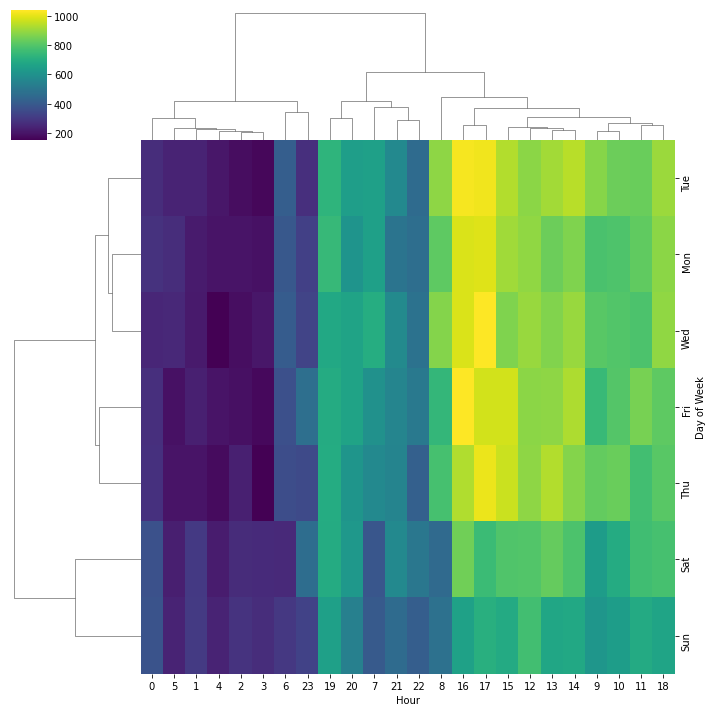

In [43]:
sns.clustermap(data=dayHour,cmap='viridis')

### Repeating the same plots and operations but the data frame shows Month as the columns

In [44]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

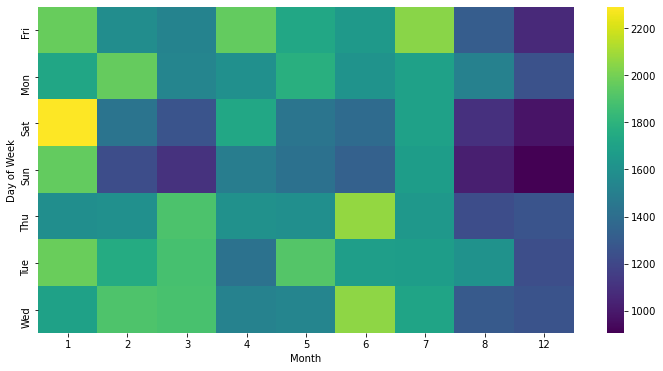

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(data = dayMonth,cmap='viridis')

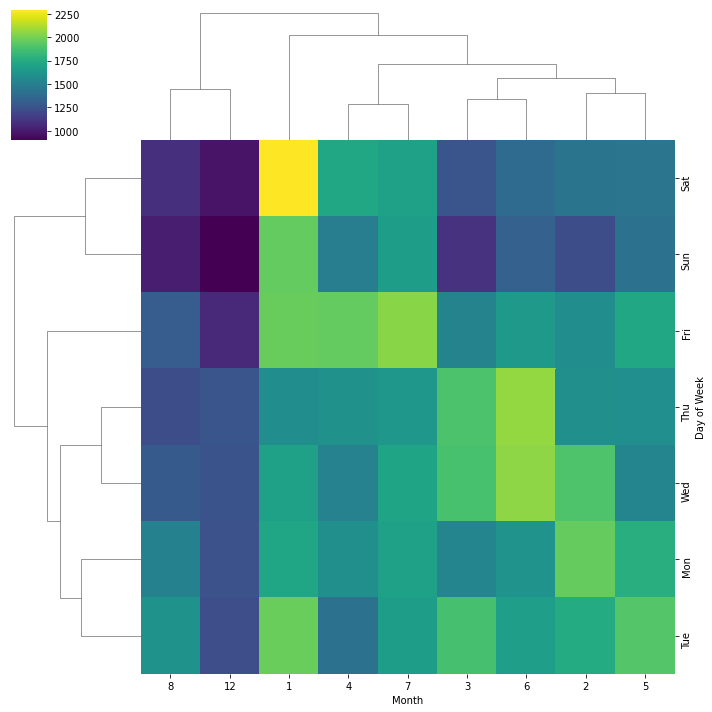

In [46]:
sns.clustermap(dayMonth,cmap='viridis')